<a href="https://colab.research.google.com/github/Dohyung-K/Digital_Curation/blob/master/Curation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **E-Museum dataset : Human and Animal Detection in Oriental Painting Artworks**
---
# ⏹**Reference**
✅ https://github.com/open-mmlab/mmdetection </br>
✅ https://mmdetection.readthedocs.io/en/latest/

# ⏹**Pre-setting**
1) Model test 및 inference에 필요한 <b>6가지 요소</b> **'Images 폴더', 'annotations 폴더', 'config file', 'detection model', 'label.txt', '.json 파일'**을 Google 드라이브에 업로드
  * 본 스크립트에서 사용한 데이터 저장위치 : 내드라이브 > Colab_Notebooks >  Curation > dataset_2i 



```
- 내 드라이브
    - Colab_Notebooks (#default로 생성되는 'Colab Notebooks'이 아님. Colab과 Notebooks사이에 언더바'_' 필요)
        - Curation
            - dataset_2i
                - annotations 
                    |- 2.xml
                    |- 3.xml
                    |- ...
                - images (#본 스크립트는 test를 위한 코드지만 mmdetection 특성상 config 재정의를 위해 train, val, test의 모든 이미지가 들어감)
                    |- 2.jpg
                    |- 3.jpg.
                    |- ...
                - emuseum_faster_rcnn_conf.py 
                - epoch_12_3.pth
                - labels.txt
                - test_anno_r.json
                - train_anno_i.json (#본 스크립트는 test를 위한 코드지만 mmdetection 특성상 config 재정의를 위해 필요)
                - val_anno_i.json (#본 스크립트는 test를 위한 코드지만 mmdetection 특성상 config 재정의를 위해 필요)
```

* <b>annotations</b> : 본 스크립트는 test를 위한 코드지만 mmdetection 특성상 config 재정의를 위해 <b>train, val, test의 모든 xml파일</b>이 들어감
* <b>Images</b> : 본 스크립트는 test를 위한 코드지만 mmdetection 특성상 config 재정의를 위해 <b>train, val, test의 모든 이미지</b>가 들어감
* <b>config file</b> : emuseum_faster_rcnn_conf.py
* <b>detection model</b> : epoch_12_3.pth
* <b>label. txt</b> : 탐지 대상인 11개의 레이블이 적혀있는 .txt 파일
* <b>json file</b> : 본 스크립트는 test를 위한 코드지만 mmdetection 특성상 config 재정의를 위해, <b>train / val / test json파일 3가지를 모두 업로드</b> 



2) 소스코드를 실행하기 전 <b>[런타임] - [런타임유형변경] - [GPU]</b> 로 설정되어 있는 지 확인</br>
 
</br>

 ---

#⏹ **Model test and evaluation**

###🟦 **1. 의미기반 비주얼 검색 정확도(목표치 : mAP 60% 이상 / IoU 0.5 기준)**

#### **1) Install MMdetection package** 

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



❗ **아래의 cell완료까지 약 15분 소요**

In [ ]:
#!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full
#!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install
#!pip install Pillow==7.0.0

     |████████████████████████████████| 389 kB 15.4 MB/s 
     |████████████████████████████████| 185 kB 75.4 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.16-cp37-cp37m-linux_x86_64.whl size=43581880 sha256=18d0479ab81123d8424accdae7032baddd3a9b6a63b9017911c4b67e361d2c18
  Stored in directory: /root/.cache/pip/wheels/ea/0a/1e/95428dfef725d66e6693b61180b928c293489b6d13df3ae0e2
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 21470, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21470 (delta 4), reused 4 (delta 0), pack-reused 21454
Receiving objects: 100% (21470/21470), 25.04 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (15069/15069), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writi

❗ **아래의 셀을 실행하기전 Restart kernel을 실행해야함**
* <b>[런타임] - [런타임 다시시작] 클릭</b> 후 실행 할것
* 런타임 다시 시작을 하지 않으면 오류가 발생하여, <b>런타임 유형변경 및 초기화를 하면 처음부터 위의 과정을 다시 설치해야하므로 주의 필요</b>

In [ ]:
# ★'Restart the kernel' before executing the code below★

# Check Pytorch installation
#import torch, torchvision
#print(torch.__version__, torch.cuda.is_available())

import mmcv
from mmdet.apis import init_detector, inference_detector

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

2.17.0
11.1
GCC 7.5


#### **2) Google Drive Mount** 
* 개인 구글드라이브를 코랩과 연동하여 드라이브 내 데이터를 불러오기 위해 필요

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **3) Model Config 설정** 
* config, checkpint file 및 dataset 환경 파라미터 수정
* 현재 위의 pre-setting에 맞게 data_root가 설정되어 있음

In [ ]:
from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed

In [ ]:
@DATASETS.register_module(force=True)
class EmuseumDataset(CocoDataset):
  #CLASSES = ('person', 'bird', 'butterfly', 'cat', 'chicken', 'cow', 'crab', 'deer', 'dog', 'fish', 'frog', 'horse', 'monkey', 'mouse', 'rabbit', 'squirrel', 'tiger', 'turtle')
  CLASSES = ('person', 'bird', 'butterfly', 'cat', 'chicken', 'cow', 'deer', 'dog', 'fish','horse','tiger')
#config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r101_fpn_1x_coco.py'
#checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth'
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth'

cfg = Config.fromfile(config_file)

cfg.dataset_type = 'EmuseumDataset'
cfg.data_root = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/'
 
cfg.data.train.type = 'EmuseumDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/'
cfg.data.train.ann_file = 'train_anno_i.json'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'EmuseumDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/'
cfg.data.val.ann_file = 'val_anno_i.json'
cfg.data.val.img_prefix = 'images'


cfg.data.test.type = 'EmuseumDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/'
cfg.data.test.ann_file = 'test_anno_r.json'
cfg.data.test.img_prefix = 'images'

cfg.model.roi_head.bbox_head.num_classes = 11
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth'

cfg.work_dir = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i'

cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

cfg.data.samples_per_gpu = 1

cfg.lr_config.policy='step'
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.train.pipeline=[

            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(type='Resize', img_scale=(512, 360), keep_ratio=True),
            dict(type='RandomFlip', flip_ratio=0.5),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='DefaultFormatBundle'),
            dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
        ]

cfg.data.val.pipeline=[
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(512, 360),
                flip=False,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='ImageToTensor', keys=['img']),
                    dict(type='Collect', keys=['img'])
                ])
        ]

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='Resize', img_scale=(512, 360), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]

cfg.test_pipeline = [

    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(512, 360),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ])
]


print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://resnext101_64x4d'),
        groups=64,
        base_width=4),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
      

In [ ]:
cfg.dump('/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/emuseum_faster_rcnn_conf.py')

#### **4) 모델 및 config파일 설정 / evaluation 방법 설정 / inference 이미지 저장 경로 설정** 
* 본 모델은 COCO 형식으로 만들어졌으므로, eval에 'bbox'로 지정

In [ ]:
!mkdir -p /content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/show_test_output

In [ ]:
 %cd /content/mmdetection
!python tools/test.py /content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/emuseum_faster_rcnn_conf.py /content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/epoch_12.pth \
--eval 'bbox' \
--show-dir /content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/show_test_output

/content/mmdetection
Traceback (most recent call last):
  File "tools/test.py", line 238, in <module>
    main()
  File "tools/test.py", line 177, in main
    dataset = build_dataset(cfg.data.test)
  File "/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/builder.py", line 80, in build_dataset
    dataset = build_from_cfg(cfg, DATASETS, default_args)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 45, in build_from_cfg
    f'{obj_type} is not in the {registry.name} registry')
KeyError: 'EmuseumDataset is not in the dataset registry'


#### **5) Test dataset 및 dataloader 생성** 
* 아래의 셀을 실행한 후 반드시 image key value가 tensor형태로 출력되어야함

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)

dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        samples_per_gpu=cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


{'img': [tensor([[[[0.3309, 0.5022, 0.4337,  ..., 0.6049, 0.5193, 0.6563],
            [0.4679, 0.4679, 0.3994,  ..., 0.3481, 0.4166, 0.4508],
            [0.4337, 0.4851, 0.4851,  ..., 0.5536, 0.4851, 0.5536],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[0.4503, 0.5378, 0.5728,  ..., 0.6429, 0.6604, 0.7304],
            [0.5203, 0.5378, 0.5203,  ..., 0.4153, 0.4853, 0.5203],
            [0.5028, 0.5903, 0.5378,  ..., 0.5903, 0.5553, 0.6078],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[0.6008, 0.7576, 0.7925,  ..., 0.8622, 0.8797, 0.9668],
            [0.6879, 0.7402, 0.7054,  ..., 0.6531, 0.6879, 0.7576],

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
checkpoint_file = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/epoch_12.pth'
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


#### **6) Model evaluation** 

In [ ]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
'''
import os.path as osp
import pickle
import shutil
import tempfile
import time

import mmcv
import torch
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmcv.runner import get_dist_info

from mmdet.core import encode_mask_results
'''
model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
'''
def single_gpu_test(model,
                    data_loader,
                    show=False,
                    out_dir=None,
                    show_score_thr=0.3):
    model.eval()
    results = []
    dataset = data_loader.dataset
    prog_bar = mmcv.ProgressBar(len(dataset))
    for i, data in enumerate(data_loader):
        with torch.no_grad():
            result = model(return_loss=False, rescale=True, **data)

        batch_size = len(result)
        if show or out_dir:
            if batch_size == 1 and isinstance(data['img'][0], torch.Tensor):
                img_tensor = data['img'][0]
            else:
                img_tensor = data['img'][0].data[0]
            img_metas = data['img_metas'][0].data[0]
            imgs = tensor2imgs(img_tensor, **img_metas[0]['img_norm_cfg'])
            assert len(imgs) == len(img_metas)

            for i, (img, img_meta) in enumerate(zip(imgs, img_metas)):
                h, w, _ = img_meta['img_shape']
                img_show = img[:h, :w, :]

                ori_h, ori_w = img_meta['ori_shape'][:-1]
                img_show = mmcv.imresize(img_show, (ori_w, ori_h))

                if out_dir:
                    out_file = osp.join(out_dir, img_meta['ori_filename'])
                else:
                    out_file = None

                model.module.show_result(
                    img_show,
                    result[i],
                    show=show,
                    out_file=out_file,
                    score_thr=show_score_thr,
                    bbox_color=(0, 255, 0),
                    text_color=(72, 101, 241),
                    thickness=10, 
                    font_size=60)
'''           


# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
#mmdet->apis->test.py->single_gpu_test에서 model.module.show_result() 수정
              
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/show_test_output', 0.5)

[                                                  ] 0/554, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 554/554, 1.1 task/s, elapsed: 519s, ETA:     0s

In [ ]:
print('결과 outputs type:', type(outputs))
print('evalution 된 파일의 갯수:', len(outputs))
print('첫번째 evalutation 결과의 type:', type(outputs[0]))
print('첫번째 evaluation 결과의 CLASS 갯수:', len(outputs[0]))
print('첫번째 evaluation 결과의 CLASS ID 0의 type과 shape', type(outputs[0][0]), outputs[0][0].shape)

결과 outputs type: <class 'list'>
evalution 된 파일의 갯수: 554
첫번째 evalutation 결과의 type: <class 'list'>
첫번째 evaluation 결과의 CLASS 갯수: 11
첫번째 evaluation 결과의 CLASS ID 0의 type과 shape <class 'numpy.ndarray'> (2, 5)


In [ ]:
print(outputs)

[[array([[6.4208557e+02, 9.3177411e+02, 1.5481805e+03, 2.4020007e+03,
        8.4674674e-01],
       [2.8490396e+02, 6.0275214e+02, 1.9313730e+03, 2.8723040e+03,
        7.2360778e-01]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32)], [array([[8.34438538e+02, 4.57556763e+02, 1.72381763e+03, 1.42394470e+03,
        8.23538065e-01],
       [1.04230469e+03, 4.49104156e+02, 1.45882385e+03, 1.21866602e+03,
        2.40022421e-01],
       [7.82825378e+02, 3.75084198e+02, 1.78681555e+03, 2.21361841e+03,
        1.20300524e-01]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([

In [ ]:
metric = dataset.evaluate(outputs, metric='bbox')
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.56s).
Accumulating evaluation results...
DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.640
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.443
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.415
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95

#### **7) Testset inference 결과 이미지 전체 저장(선택조건)** 
* 위의 6번 Model evaluation이 끝난 후, 자동으로 show_test_out 폴더가 생성되어 testset에 대한 detection 결과 이미지(bbox, confidence score)가 저장됨
* 그러나 testset으로 쓴 문화재 이미지들은 high-resolution 이미지들로 구성되어있어, bbox 및 confidence score text가 그림 위에 상대적으로 작게 나타남
* 따라서 아래와 같이 코드를 수정하여 bbox line 및 text의 크기를 크게 바꾸어 output 시킬 수 있음. 
* 아래의 코드를 실행하면 한번 더 6번과 같은 inference를 수행해야하므로, model의 mAP확인은 위의 결과물에서 확인하고, 이미지를 한번 더 따로 저장하고 싶을 때 본 코드를 사용하면 됨
 


In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
checkpoint_file = '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/epoch_12.pth'
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

In [ ]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

import os.path as osp
import pickle
import shutil
import tempfile
import time

import mmcv
import torch
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmcv.runner import get_dist_info

from mmdet.core import encode_mask_results

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])

def single_gpu_test(model,
                    data_loader,
                    show=False,
                    out_dir=None,
                    show_score_thr=0.3):
    model.eval()
    results = []
    dataset = data_loader.dataset
    prog_bar = mmcv.ProgressBar(len(dataset))
    for i, data in enumerate(data_loader):
        with torch.no_grad():
            result = model(return_loss=False, rescale=True, **data)

        batch_size = len(result)
        if show or out_dir:
            if batch_size == 1 and isinstance(data['img'][0], torch.Tensor):
                img_tensor = data['img'][0]
            else:
                img_tensor = data['img'][0].data[0]
            img_metas = data['img_metas'][0].data[0]
            imgs = tensor2imgs(img_tensor, **img_metas[0]['img_norm_cfg'])
            assert len(imgs) == len(img_metas)

            for i, (img, img_meta) in enumerate(zip(imgs, img_metas)):
                h, w, _ = img_meta['img_shape']
                img_show = img[:h, :w, :]

                ori_h, ori_w = img_meta['ori_shape'][:-1]
                img_show = mmcv.imresize(img_show, (ori_w, ori_h))

                if out_dir:
                    out_file = osp.join(out_dir, img_meta['ori_filename'])
                else:
                    out_file = None

                model.module.show_result(
                    img_show,
                    result[i],
                    show=show,
                    out_file=out_file,
                    score_thr=show_score_thr,
                    bbox_color=(0, 255, 0),
                    text_color=(72, 101, 241),
                    thickness=10, 
                    font_size=60)
              


# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
#mmdet->apis->test.py->single_gpu_test에서 model.module.show_result() 수정   
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/drive/MyDrive/Colab_Notebooks/Curation/dataset_2i/show_test_output', 0.5)

[                                                  ] 0/554, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


###🟦 **2. 이미지기반 관계 분석 정확도 (목표치 : Top-50 65%이상)**

* <b>Top-50 Accuracy 성능지표 적용의 한계점 및 대체 방안</b> 
  * <b>한계점</b> 
    * Top-50 accuracy는 <b>Class의 갯수가 약 1000개 이상인 대용량의 Public dataset</b>을 기반으로 하는 Image classification 문제에서 <b>Softmax를 통해 나오는 output 중 점수가 높은 상위 50개 output안에 True label이 존재할 때, 이를 정확하게 예측했다고 평가하는 기준</b>임.

    * 그러나 본 연구에서는 회화문화재 속 객체를 대상으로 하여 object class가 11개(person, bird, butterfly, cat,chicken, cow, deer, dog, fish, horse, tiger)로 구성되어 있으므로 <b>위의 기준을 적용하기 적합하지 않으며, 1장의 이미지안에 한 종류의 class가 존재하지 않고 여러 종류의 class가 들어있는 한계점이 존재</b>함</br>

  * <b>대체 방안</b>  
    * 이전 업무회의에서 진행된 <b>Top-50 기준에 대한 평가 방법 논의사항</b>을 바탕으로 위에서 실험한 '의미기반 비주얼 검색 정확도' 결과이미지를 사용하여 성능 결과를 도출함
    * testset inference 결과로 나온 이미지(bbox 및 class 예측에 대한 confidence score가 표시되어 있음)에서 <b>object location을 올바르게 검출한 결과가 object class 또한 분류를 정확하게 했는지 평가</b>함
      * ex) <b>object의 location 제대로 탐지한 후 dog를 dog라고 분류했는지, dog를 다른 동물이라고 분류했는지 파악</b>
    * 성능지표 결과도출 방법은 inference 결과 이미지를 manual하게 counting하여 2차원 array를 생성 후 <b>Confusion matrix를 시각화하고, 분류 정확도(Accuracy)를 도출</b>함 


* <b>데이터 클래스의 불균형 이유</b> 
    * 현재 <b>E-meseum 내 존재하는 실제 회화문화재 이미지에는 인물, 새, 나비, 소, 말등이 표현된 그림이 많이 존재</b>함
    * 민화 및 image generation을 통해 생성된 이미지들을 testset으로 사용할 경우 object의 class들을 비교적 균형있게 조정할 수 있으나, 실제 문화재를 대상으로 실험을 진행하여 데이터 클래스의 불균형이 발생함 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.xlabel('True label' + stats_text)
        plt.ylabel('Predicted label' + stats_text)
        #plt.ylabel('True label')
        #plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
import numpy as np
import seaborn as sns
#from cf_matrix import make_confusion_matrix
sns.set_context('talk')

In [ ]:
object_classes = ['person', 'bird', 'butterfly', 'cat', 'chicken', 'cow', 'deer', 'dog', 'fish','horse','tiger']
cf_matrix_11x11 = np.array([[397, 6, 1, 0, 0, 0, 0, 0, 1, 1, 0],
                          [0, 241,  1, 0, 4, 0, 0, 0, 0, 1, 0],
                          [0, 1, 193, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 18, 0, 0, 0, 3, 0, 0, 4],
                          [0, 2, 1, 0, 23, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 23, 0, 0, 0, 1, 0],
                          [0, 1, 0, 0, 0, 0, 11, 0, 0, 3, 0],
                          [0, 0, 0, 0, 0, 0, 0, 14, 0, 2, 0],
                          [0, 27, 2, 0, 1, 0, 3, 0, 57, 3, 3],
                          [1, 0, 0, 0, 0, 2, 0, 0, 0, 87, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15]])

In [ ]:
accuracy  = np.trace(cf_matrix_11x11) / float(np.sum(cf_matrix_11x11))


        #if it is a binary confusion matrix, show some more stats
if len(cf_matrix_11x11)==11:
            #Metrics for Binary Confusion Matrices
  precision = cf_matrix_11x11[1,1] / sum(cf_matrix_11x11[:,1])
  recall    = cf_matrix_11x11[1,1] / sum(cf_matrix_11x11[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
  accuracy = format(accuracy, ".3f")
  precision = format(precision, ".3f")
  recall = format(recall, ".3f")

print('Accuracy : ', accuracy)
print('Precision : ', precision)
print('Recall : ', recall)

Accuracy :  0.933
Precision :  0.861
Recall :  0.976


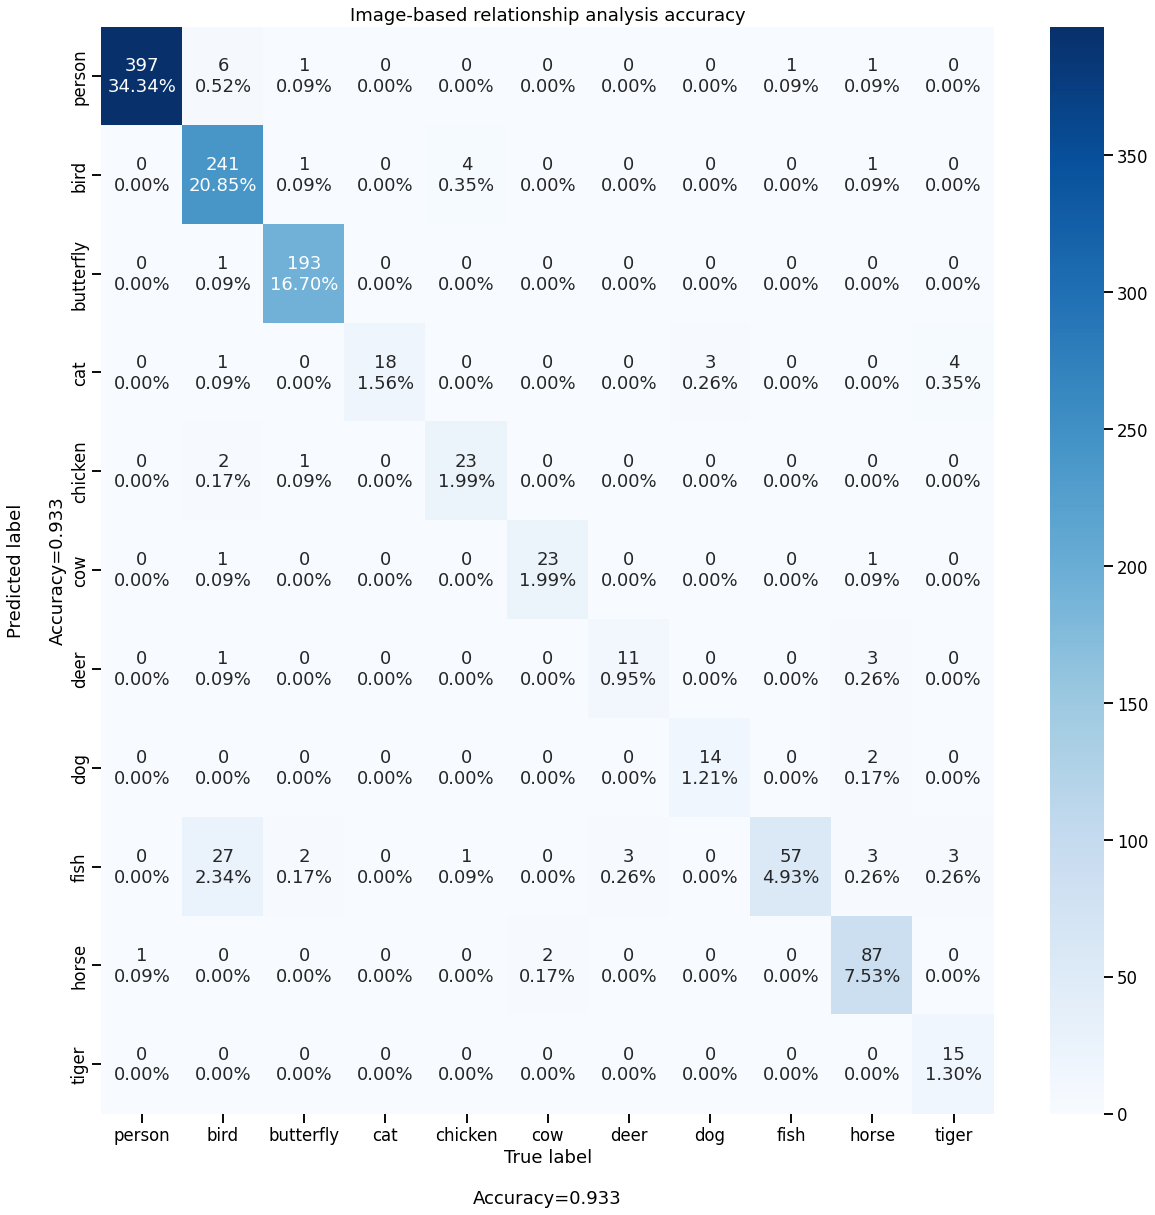

In [ ]:
make_confusion_matrix(cf_matrix_11x11, categories=object_classes, figsize=(20,20), cbar=True, cmap = 'Blues', title='Image-based relationship analysis accuracy')